<a href="https://colab.research.google.com/github/AnilKumar-06/ML_Models/blob/main/KNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("/content/drive/MyDrive/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis

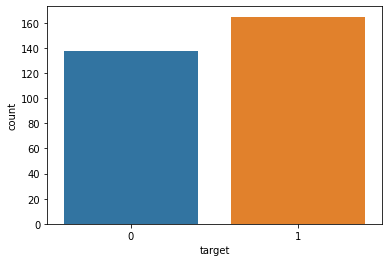

In [8]:
#univariate analysis for target variable
sns.countplot(data['target'])
plt.show()

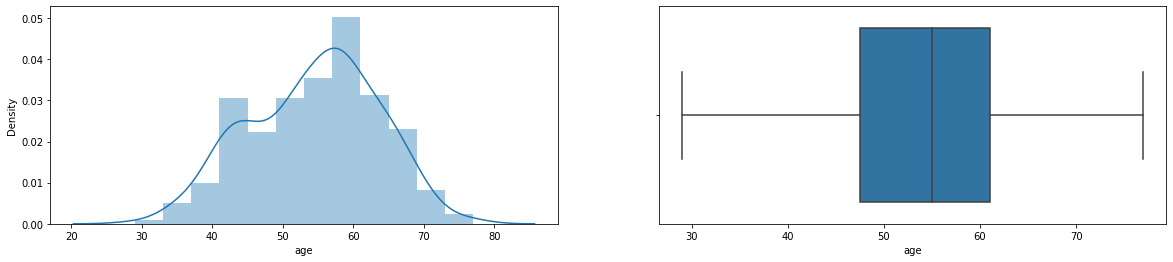

In [9]:
#univariate analysis for the variable age
fig = plt.figure(figsize = (20, 4))

#(1,2,1)-> 1x2 plot 1->firstplot
fig.add_subplot(1,2,1)
sns.distplot(data['age'])

fig.add_subplot(1,2,2)
sns.boxplot(data['age'])

plt.show()

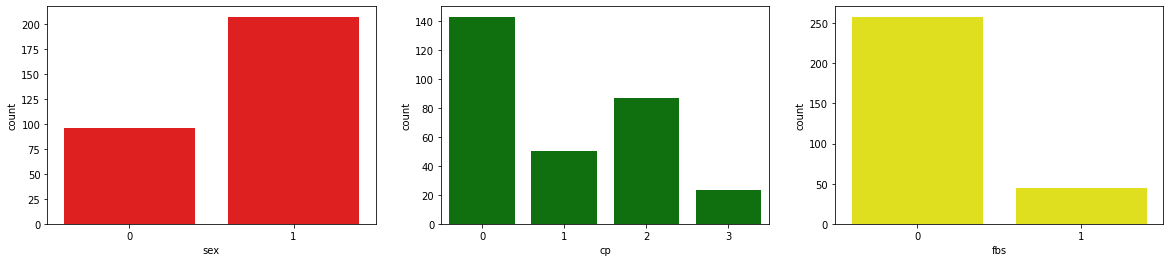

In [10]:
#univariate analysis for sex 1 -> male, 0 ->female , chest pain (cp) 0->typical angina, 1 -> atypical angine,
#2 -> non original pain, 3 -> asymptotic and fasting blood sugar 1 if > 120mg/dl, 0 otherwise

fig = plt.figure(figsize=(20, 4))

fig.add_subplot(1,3,1)
sns.countplot(data['sex'], color = 'red')

fig.add_subplot(1,3,2)
sns.countplot(data['cp'], color = 'green')

fig.add_subplot(1,3,3)
sns.countplot(data['fbs'], color = 'yellow')

plt.show()

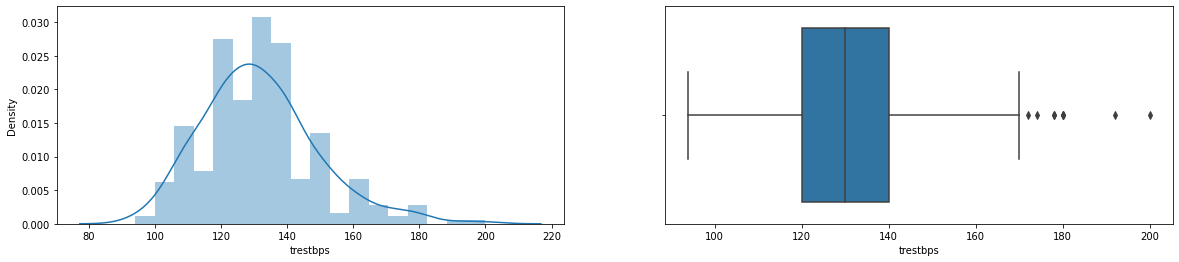

In [11]:
#Univariate analysis for resting blood pressure(mm Hg) atau trestbps

fig = plt.figure(figsize = (20,4))

fig.add_subplot(1,2,1)
sns.distplot(data['trestbps'])

fig.add_subplot(122)
sns.boxplot(data['trestbps'])
plt.show()

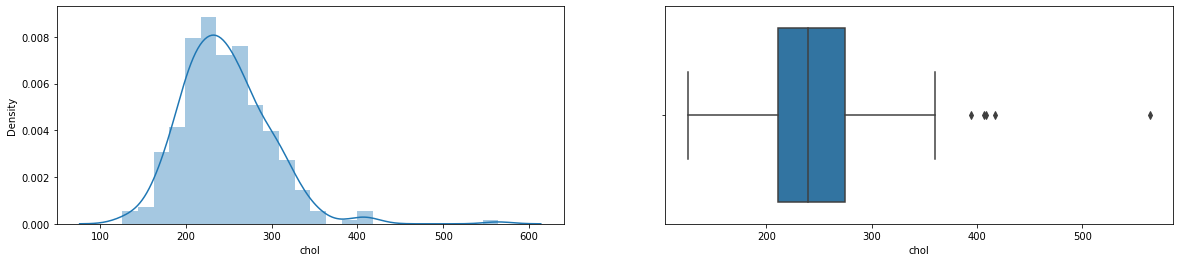

In [12]:
#univariate analysis serum cholestrol (mg/dl)
fig = plt.figure(figsize = (20, 4))

fig.add_subplot(121)
sns.distplot(data['chol'])

fig.add_subplot(122)
sns.boxplot(data['chol'])

plt.show()

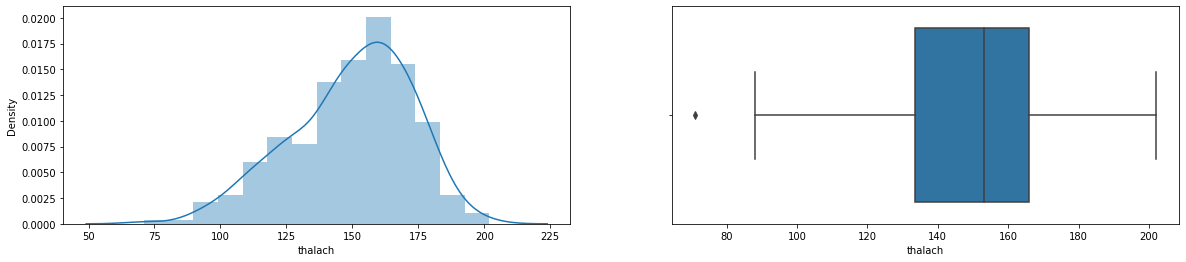

In [15]:
#univariate analysis mamximum heart rate 
fig = plt.figure(figsize = (20, 4))
fig.add_subplot(121)
sns.distplot(data['thalach'])

fig.add_subplot(122)
sns.boxplot(data['thalach'])
plt.show()

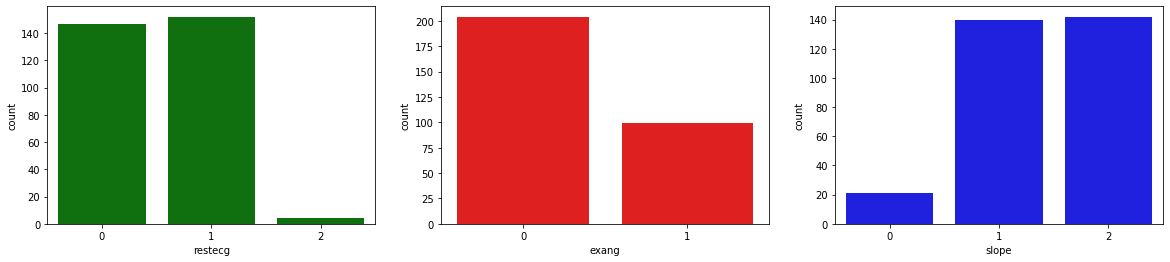

In [17]:
#univariate analysis for resting electrocardiographic results; 0 = normal, 1 = having ST-T wave abnormality;
#2 = showing probable or definite left ventricular hypertrophy
#univariate analysis excercise induced; 1=yes, 0=no
#univariate analysis the slope of the peak excercise ST segment; 0=upsloping, 1=flat, 2=downsloping
fig = plt.figure(figsize = (20, 4))

fig.add_subplot(131)
sns.countplot(data['restecg'], color = 'green')

fig.add_subplot(132)
sns.countplot(data['exang'], color = 'red')

fig.add_subplot(133)
sns.countplot(data['slope'], color = 'blue')

plt.show()

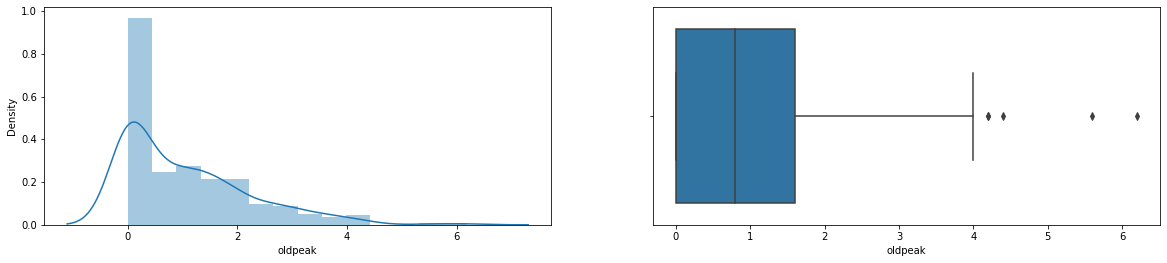

In [20]:
#univariate analysis ST depression include by excercise relative to rest

fig = plt.figure(figsize=(20, 4))

fig.add_subplot(121)
sns.distplot(data['oldpeak'])

fig.add_subplot(122)
sns.boxplot(data['oldpeak'])
plt.show()

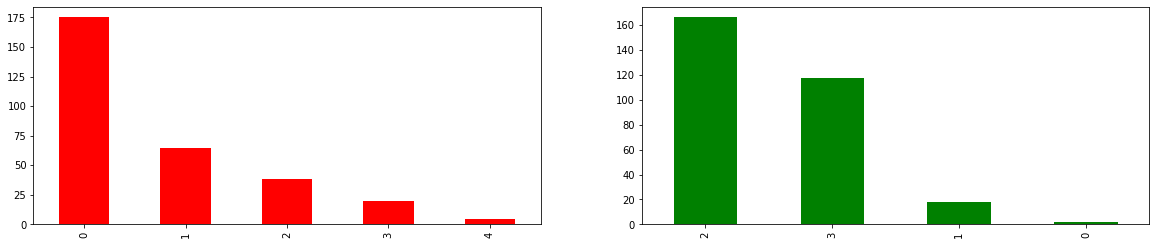

In [28]:
#univariate analysis ca number of major vessels (0-3) colored flourosopy
#univariate analysis thal

fig = plt.figure(figsize=(20, 4))

fig.add_subplot(1,2,1)
data['ca'].value_counts().plot(kind = 'bar', color='red')

fig.add_subplot(1,2,2)
data['thal'].value_counts().plot(kind = 'bar', color='green')
plt.show()

In [29]:
data.corr().style.background_gradient().set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


In [30]:
knn = KNeighborsClassifier()
x = data.drop(columns=['target'])
y = data['target']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#checking performance our model with ROC score
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61



0.5655555555555556

In [36]:
#List Hyperparameter that we want to time
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p = [1, 2]

 #convert to dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p)

 #Create new KNN object
knn_2 = KNeighborsClassifier()

 #Use GridSearchCV

clf = GridSearchCV(knn_2, hyperparameters, cv = 10)

 #fit the model
best_model = clf.fit(x, y)

 #print the value of best Hyperparameters
print('Best leaf_size : ', best_model.best_estimator_.get_params()['leaf_size'])

print('Best P:', best_model.best_estimator_.get_params()['p'])

print("Best n_nerighbours:", best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size :  1
Best P: 1
Best n_nerighbours: 7


In [37]:
y_pred = best_model.predict(x_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.81      0.81      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [39]:
roc_auc_score(y_test, y_pred)

0.7627777777777778